<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Trương Tiến Anh

**MSSV**: 22120017


---

# Thư viện

In [41]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [42]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8662 entries, 0 to 8661
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8662 non-null   object 
 1   loai_dien_thoai         8662 non-null   object 
 2   thoi_gian_bao_hanh      8662 non-null   float64
 3   danh_gia                8662 non-null   float64
 4   so_luong_binh_luan      8662 non-null   int64  
 5   duong_dan               8662 non-null   object 
 6   mau_sac                 8376 non-null   object 
 7   gia_moi                 7148 non-null   float64
 8   gia_cu                  5083 non-null   float64
 9   he_dieu_hanh            8662 non-null   object 
 10  cpu                     8647 non-null   object 
 11  ram                     8646 non-null   float64
 12  bo_nho_trong            8362 non-null   float64
 13  dung_luong_pin          8462 non-null   float64
 14  thiet_ke                8546 non-null   

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\r\n8 nh...,4.0,64.0,3000.0,Khung nhôm\r\nMặt trước kính Gorilla Glass 5\r...,LG,True,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
1,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\r\n8 nh...,6.0,128.0,3000.0,Khung nhôm\r\nMặt trước kính Gorilla Glass 5\r...,LG,True,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
2,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\r\n8 nh...,4.0,64.0,3000.0,Khung nhôm\r\nMặt trước kính Gorilla Glass 5\r...,LG,True,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
3,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\r\n8 nh...,6.0,128.0,3000.0,Khung nhôm\r\nMặt trước kính Gorilla Glass 5\r...,LG,True,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
4,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xanh,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\r\n8 nh...,4.0,64.0,3000.0,Khung nhôm\r\nMặt trước kính Gorilla Glass 5\r...,LG,True,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]


# Câu hỏi: Mức giá giảm có ảnh hưởng đến lượt đánh giá và mức độ hài lòng của khách hàng không?

## Mục đích
- Đánh giá tác động của giá cả đến hành vi tiêu dùng của khách hành để tìm ra những chiến thuật kinh doanh tốt nhất.
- Đưa ra các quyết định kinh doanh thông minh dựa trên dữ liệu đã được xử lý


## Tiền xử lý

In [43]:
df = data[["gia_cu", "gia_moi", "so_luong_binh_luan"]].copy().dropna()

# Tính toán mức giá giảm = Gía cũ - Gía mới
df['Mức giá giảm'] = df['gia_cu'] - df['gia_moi']
df['Có giảm giá'] = df['Mức giá giảm'] > 0

#Tính trung bình lượt đánh giá theo sản phẩm có giảm giá
mean_rate = df.groupby('Có giảm giá')['so_luong_binh_luan'].mean()
mean_rate

Có giảm giá
False    455.638710
True     245.232216
Name: so_luong_binh_luan, dtype: float64

## Trực quan hóa

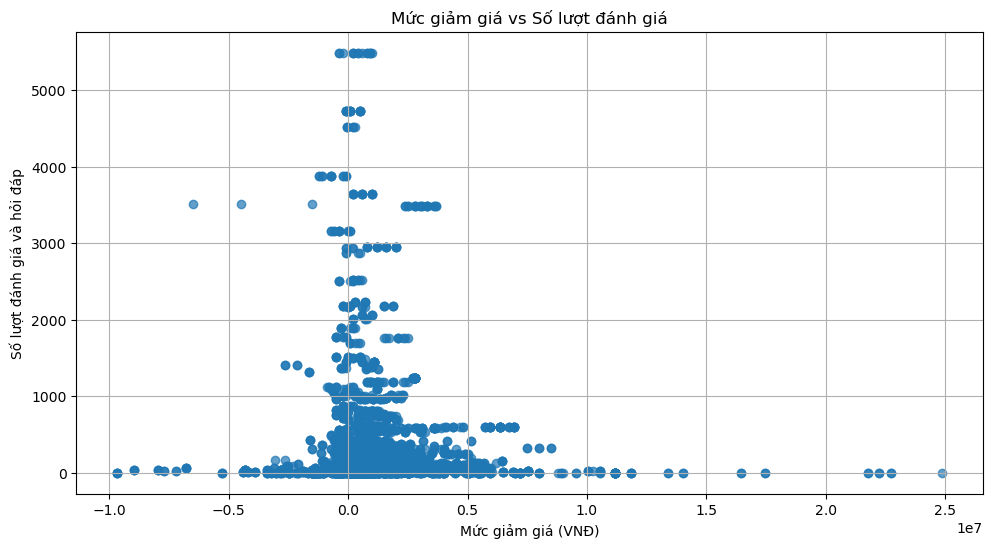

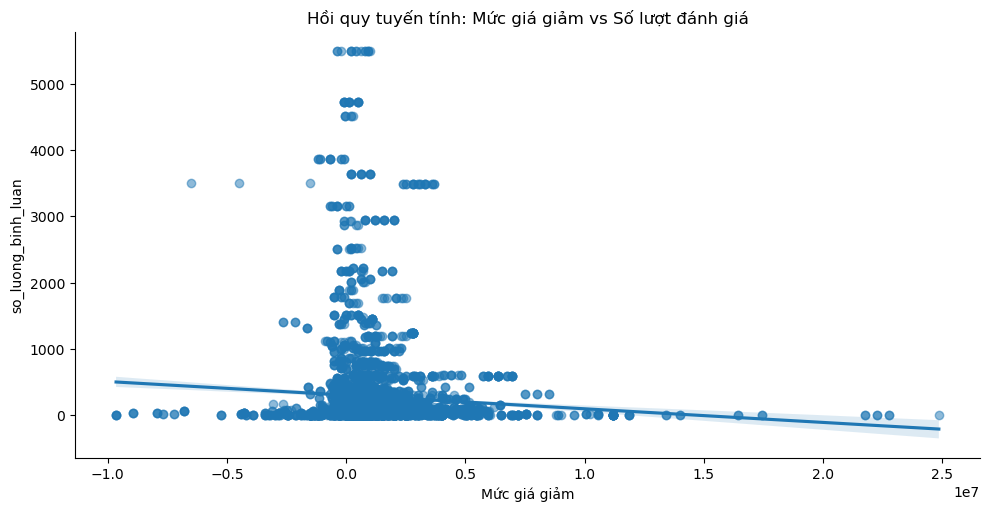

Hệ số tương quan: -0.06301890800635865


In [44]:
# Vẽ biểu đồ phân tán: Mức giảm giá với Số lượt đánh giá
plt.figure(figsize=(11.7, 6))
plt.scatter(df['Mức giá giảm'], df['so_luong_binh_luan'], alpha=0.7)
plt.title("Mức giảm giá vs Số lượt đánh giá")
plt.xlabel("Mức giảm giá (VNĐ)")
plt.ylabel("Số lượt đánh giá và hỏi đáp")
plt.grid(True)
plt.show()

#Hồi quy tuyến tính
sns.lmplot(x='Mức giá giảm', y='so_luong_binh_luan', data=df, aspect=2, scatter_kws={'alpha':0.5})
plt.title("Hồi quy tuyến tính: Mức giá giảm vs Số lượt đánh giá")
plt.show()

#Hệ số tương quan
correlation = df['Mức giá giảm'].corr(df['so_luong_binh_luan'])
print(f'Hệ số tương quan: {correlation}')

## Nhận xét
- Hệ số tương quan giữa `Mức giá giảm` và `Số lượt đánh giá` là -0.0063 rất gần với 0.
- Từ hệ số tương quan ta có thể kết luận là hầu như không có mối tương quan tuyến tính giữa 2 thuộc tính này. Có thể là do `Mức giá giảm` không phải là yếu tố then chốt ảnh hưởng đến `Số lượng đánh giá`
- Từ biểu đồ ta có thể thấy dữ liệu chủ yếu tập trung ở `Mức giá giamr` thấp 
(gần 0). Có thể là do sản phẩm có mức giảm giá nhỏ không đáng kể
- Số lượt đánh giá (5000+) rải rác không đồng đều và có thể thấy nó khong phụ thuộc rõ ràng vào mức giá giảm
- Đường hồi quy gần như phẳng, thể hiện mối quan hệ yếu giữa 2 thuộc tính này hoặc không tồn tại

# Câu hỏi: Thời gian bảo hành có ảnh hưởng đến sự hài lòng của khách hàng không?

## Mục đích
- Để làm rõ xem mối liên quan giữa thời gian bảo hành và điểm đánh giá
- Tìm kiếm chiến lược kinh doanh thông minh giựa trên những đúc kết tính toán. Nếu thời gian bảo hành có tác động đến điểm đánh gái thì doanh nghiệp nên cân nhắc điều chỉnh chính sách bảo hành của mình để nâng cao sự hài lòng cũng như trung thành của khách hàng.

## Tiền xử lý

In [45]:
df = data[["thoi_gian_bao_hanh", "danh_gia"]].copy().dropna()

# Tính trung bình đánh giá theo 'Thời gian bảo hành (tháng)'
mean_satisfaction = df.groupby('thoi_gian_bao_hanh')['danh_gia'].mean()
mean_satisfaction

thoi_gian_bao_hanh
0.0     4.985872
1.0     4.975000
6.0     4.975118
12.0    4.985815
15.0    5.000000
18.0    4.975660
24.0    5.000000
30.0    4.957143
Name: danh_gia, dtype: float64

## Trực quan hóa

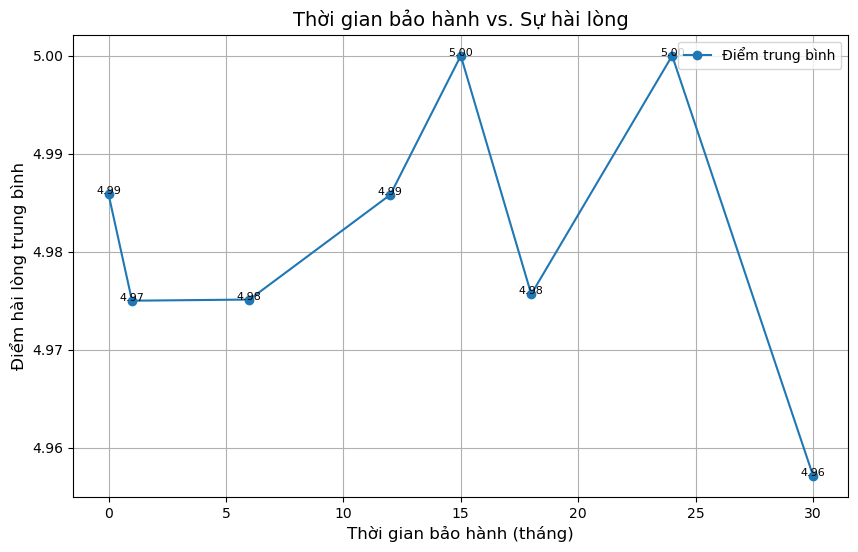

Hệ số tương quan: 0.014617309719820394


In [46]:
#Vễ biểu đồ đường để trực quan Thời gian bảo hành với sự hài lòng
plt.figure(figsize=(10, 6))
plt.plot(mean_satisfaction.index, mean_satisfaction.values, marker='o', label='Điểm trung bình')
plt.title('Thời gian bảo hành vs. Sự hài lòng', fontsize=14)
plt.xlabel('Thời gian bảo hành (tháng)', fontsize=12)
plt.ylabel('Điểm hài lòng trung bình', fontsize=12)
plt.grid(True)

for x, y in zip(mean_satisfaction.index, mean_satisfaction.values):
    plt.text(x, y, f'{y:.2f}', fontsize=8, ha='center')
plt.legend()
plt.show()

correlation = data['thoi_gian_bao_hanh'].corr(data['danh_gia'])
print(f'Hệ số tương quan: {correlation}')

## Nhận xét
- Hệ số tương quan giữa `Thời gian bảo hành` và `Đánh giá` là 0.0146 gần 0, cho thấy chúng không có mối liên hệ tuyến tính rõ ràng. Điều này có thể cho thấy việc thay đổi thời gian bảo hành không làm tăng hay giảm đáng kể điểm hài lòng của khách hàng
- Biểu đồ đường cho thấy các điểm hài lòng dao động nhẹ ở các mức thời gian bảo hành khác nhau không có xu hướng răng hay giảm rõ ràng. Có thể là do thời gian bảo hành không phải là yếu tổ then chốt đến điểm hài lòng của khác hàng